In [ ]:
# for array computations and loading data
import numpy as np
#the imports are necessary
import matplotlib as mpl
import matplotlib.pyplot as plt
# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# for building and training neural networks
import tensorflow as tf

# custom functions
# import utils

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

In [ ]:
# Load the dataset from a text file
data = np.loadtxt('/content/c2w3_lab2_data2.csv', delimiter=',')
# after that i load the data

# lngdnp
# Split the inputs and outputs into separate arrays
x_bc = data[:,:-1]
y_bc = data[:,-1]

# Convert y into 2-D because the commands later will require it (x is already 2-D)
y_bc = np.expand_dims(y_bc, axis=1)

print(f"the shape of the inputs x is: {x_bc.shape}")
print(f"the shape of the targets y is: {y_bc.shape}")

the shape of the inputs x is: (100, 2)
the shape of the targets y is: (100, 1)


In [ ]:
def plot_bc_dataset(x, y, title):
    for i in range(len(y)):
        marker = 'x' if y[i] == 1 else 'o'
        c = 'r' if y[i] == 1 else 'b'
        plt.scatter(x[i,0], x[i,1], marker=marker, c=c);
    plt.title("x1 vs x2")
    plt.xlabel("x1");
    plt.ylabel("x2");
    y_0 = mpl.lines.Line2D([], [], color='r', marker='x', markersize=12, linestyle='None', label='y=1')
    y_1 = mpl.lines.Line2D([], [], color='b', marker='o', markersize=12, linestyle='None', label='y=0')
    plt.title(title)
    plt.legend(handles=[y_0, y_1])
    plt.show()


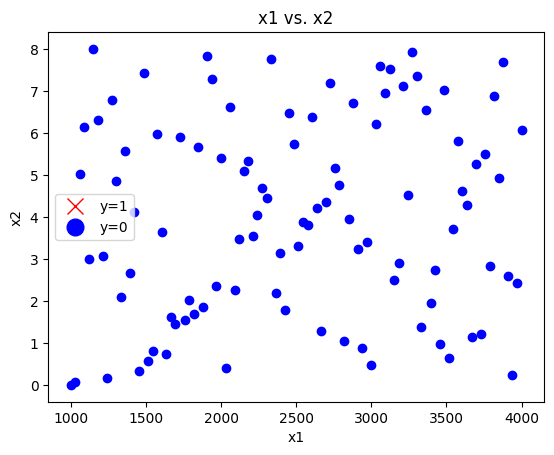

In [ ]:
plot_bc_dataset(x=x_bc, y=y_bc, title="x1 vs. x2")

In [ ]:
from sklearn.model_selection import train_test_split
# here the actual things starts which is the model selection using the sklearn.model_sleection import train_test_split

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables.
x_bc_train, x_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_
# we del the temporary ones to save space as they are no longer of use
print(f"the shape of the training set (input) is: {x_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_bc_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

the shape of the training set (input) is: (60, 2)
the shape of the training set (target) is: (60, 1)

the shape of the cross validation set (input) is: (20, 2)
the shape of the cross validation set (target) is: (20, 1)

the shape of the test set (input) is: (20, 2)
the shape of the test set (target) is: (20, 1)


In [ ]:
# Scale the features

# Initialize the class
scaler_linear = StandardScaler()
# introduce the scaler to normalise
# Compute the mean and standard deviation of the training set then transform it
x_bc_train_scaled = scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled = scaler_linear.transform(x_bc_cv)
x_bc_test_scaled = scaler_linear.transform(x_bc_test)

In [ ]:
# Sample model output
probabilities = np.array([0.2, 0.6, 0.7, 0.3, 0.8])

# Apply a threshold to the model output. If greater than 0.5, set to 1. Else 0.
predictions = np.where(probabilities >= 0.5, 1, 0)

# Ground truth labels
ground_truth = np.array([1, 1, 1, 1, 1])

# Initialize counter for misclassified data
misclassified = 0

# Get number of predictions
num_predictions = len(predictions)
#
# Loop over each prediction
for i in range(num_predictions):

    # Check if it matches the ground truth
    if predictions[i] != ground_truth[i]:

        # Add one to the counter if the prediction is wrong
        misclassified += 1

# Compute the fraction of the data that the model misclassified
fraction_error = misclassified/num_predictions
# this was just a chekc for error
print(f"probabilities: {probabilities}")
print(f"predictions with threshold=0.5: {predictions}")
print(f"targets: {ground_truth}")
print(f"fraction of misclassified data (for-loop): {fraction_error}")
print(f"fraction of misclassified data (with np.mean()): {np.mean(predictions != ground_truth)}")

probabilities: [0.2 0.6 0.7 0.3 0.8]
predictions with threshold=0.5: [0 1 1 0 1]
targets: [1 1 1 1 1]
fraction of misclassified data (for-loop): 0.4
fraction of misclassified data (with np.mean()): 0.4


In [ ]:
# Initialize lists that will contain the errors for each model
nn_train_error = []
nn_cv_error = []

# Build the models
models_bc = build_models()
# here the build model gives me a list of three models
# Loop over each model
for model in models_bc:
    # for each model I calulate the loss and optimizer
    # Setup the loss and optimizer
    model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    )

    print(f"Training {model.name}...")
  # for each of the model I use the
  #nmfnp



    # Train the model
    model.fit(
        x_bc_train_scaled, y_bc_train,
        epochs=200,
        verbose=0
    )

    print("Done!\n")

    # Set the threshold for classification
    threshold = 0.5

    # Record the fraction of misclassified examples for the training set
    yhat = model.predict(x_bc_train_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    train_error = np.mean(yhat != y_bc_train)
    nn_train_error.append(train_error)
    # add the case in which the prediction is not equal to the y_bc_train or the output
    # Record the fraction of misclassified examples for the cross validation set
    yhat = model.predict(x_bc_cv_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    cv_error = np.mean(yhat != y_bc_cv)
    nn_cv_error.append(cv_error)

# Print the result
for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )

Training model_1...
Done!

1/1 [==============================] - 0s 20ms/step
Training model_2...
Done!

1/1 [==============================] - 0s 31ms/step
Training model_3...
Done!

1/1 [==============================] - 0s 20ms/step
Model 1: Training Set Classification Error: 1.00000, CV Set Classification Error: 1.00000
Model 2: Training Set Classification Error: 1.00000, CV Set Classification Error: 1.00000
Model 3: Training Set Classification Error: 1.00000, CV Set Classification Error: 1.00000


In [ ]:
def build_models():

    tf.random.set_seed(20)

    model_1 = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(25, activation = 'relu'),
            tf.keras.layers.Dense(15, activation = 'relu'),
            tf.keras.layers.Dense(1, activation = 'linear')
        ],
        name='model_1'
    )

    model_2 = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(20, activation = 'relu'),
            tf.keras.layers.Dense(12, activation = 'relu'),
            tf.keras.layers.Dense(12, activation = 'relu'),
            tf.keras.layers.Dense(20, activation = 'relu'),
            tf.keras.layers.Dense(1, activation = 'linear')
        ],
        name='model_2'
    )

    model_3 = tf.keras.Sequential(
        [
            tf.keras.layers.Dense(32, activation = 'relu'),
            tf.keras.layers.Dense(16, activation = 'relu'),
            tf.keras.layers.Dense(8, activation = 'relu'),
            tf.keras.layers.Dense(4, activation = 'relu'),
            tf.keras.layers.Dense(12, activation = 'relu'),
            tf.keras.layers.Dense(1, activation = 'linear')
        ],
        name='model_3'
    )

    model_list = [model_1, model_2, model_3]

    return model_list



In [ ]:
# Select the model with the lowest error
model_num = 3
# I choose the model which is the best
# Compute the test error
yhat = models_bc[model_num-1].predict(x_bc_test_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

1/1 [==============================] - 0s 94ms/step
Selected Model: 3
Training Set Classification Error: 1.0000
CV Set Classification Error: 1.0000
Test Set Classification Error: 1.0000


In [ ]:
# for building linear regression models
from sklearn.linear_model import LinearRegression, Ridge


the shape of the training set (input) is: (60, 2)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 2)
the shape of the cross validation set (target) is: (20,)

first 5 rows of the training inputs (1 feature):
 [[3.76e+03 5.49e+00]
 [2.88e+03 6.71e+00]
 [3.55e+03 3.72e+00]
 [1.58e+03 5.98e+00]
 [1.67e+03 1.62e+00]]



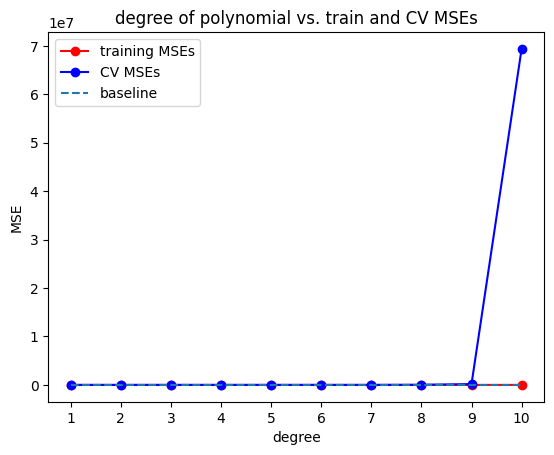

In [ ]:
# Split the dataset into train, cv, and test
x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_dataset('/content/c2w3_lab2_data2.csv')
# so here we ise the
print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")

# Preview the first 5 rows
print(f"first 5 rows of the training inputs (1 feature):\n {x_train[:5]}\n")

# Instantiate the regression model class
model = LinearRegression()

# Train and plot polynomial regression models
train_plot_poly(model, x_train, y_train, x_cv, y_cv, max_degree=10, baseline=400)

In [ ]:

def prepare_dataset(filename):

    data = np.loadtxt(filename, delimiter=",")

    x = data[:,:-1]
    y = data[:,-1]

    # Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables.
    x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=80)

    # Split the 40% subset above into two: one half for cross validation and the other for the test set
    x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=80)

    return x_train, y_train, x_cv, y_cv, x_test, y_test


In [ ]:

def prepare_dataset(filename):

    data = np.loadtxt(filename, delimiter=",")

    x = data[:,:-1]
    y = data[:,-1]

    # Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables.
    x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=80)

    # Split the 40% subset above into two: one half for cross validation and the other for the test set
    x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=80)

    return x_train, y_train, x_cv, y_cv, x_test, y_test


In [ ]:

def prepare_dataset(filename):

    data = np.loadtxt(filename, delimiter=",")

    x = data[:,:-1]
    y = data[:,-1]

    # Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables.
    x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=80)

    # Split the 40% subset above into two: one half for cross validation and the other for the test set
    x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=80)

    return x_train, y_train, x_cv, y_cv, x_test, y_test

def train_plot_poly(model, x_train, y_train, x_cv, y_cv, max_degree=10, baseline=None):

    train_mses = []
    cv_mses = []
    models = []
    scalers = []
    degrees = range(1,max_degree+1)

    # Loop over 10 times. Each adding one more degree of polynomial higher than the last.
    for degree in degrees:

        # Add polynomial features to the training set
        poly = PolynomialFeatures(degree, include_bias=False)
        X_train_mapped = poly.fit_transform(x_train)

        # Scale the training set
        scaler_poly = StandardScaler()
        X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
        scalers.append(scaler_poly)

        # Create and train the model
        model.fit(X_train_mapped_scaled, y_train )
        models.append(model)

        # Compute the training MSE
        yhat = model.predict(X_train_mapped_scaled)
        train_mse = mean_squared_error(y_train, yhat) / 2
        train_mses.append(train_mse)

        # Add polynomial features and scale the cross-validation set
        poly = PolynomialFeatures(degree, include_bias=False)
        X_cv_mapped = poly.fit_transform(x_cv)
        X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

        # Compute the cross-validation MSE
        yhat = model.predict(X_cv_mapped_scaled)
        cv_mse = mean_squared_error(y_cv, yhat) / 2
        cv_mses.append(cv_mse)

    # Plot the results
    plt.plot(degrees, train_mses, marker='o', c='r', label='training MSEs');
    plt.plot(degrees, cv_mses, marker='o', c='b', label='CV MSEs');
    plt.plot(degrees, np.repeat(baseline, len(degrees)), linestyle='--', label='baseline')
    plt.title("degree of polynomial vs. train and CV MSEs")
    plt.xticks(degrees)
    plt.xlabel("degree");
    plt.ylabel("MSE");
    plt.legend()
    plt.show()

def train_plot_reg_params(reg_params, x_train, y_train, x_cv, y_cv, degree= 1, baseline=None):

    train_mses = []
    cv_mses = []
    models = []
    scalers = []

    # Loop over 10 times. Each adding one more degree of polynomial higher than the last.
    for reg_param in reg_params:

        # Add polynomial features to the training set
        poly = PolynomialFeatures(degree, include_bias=False)
        X_train_mapped = poly.fit_transform(x_train)

        # Scale the training set
        scaler_poly = StandardScaler()
        X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
        scalers.append(scaler_poly)

        # Create and train the model
        model = Ridge(alpha=reg_param)
        model.fit(X_train_mapped_scaled, y_train)
        models.append(model)

        # Compute the training MSE
        yhat = model.predict(X_train_mapped_scaled)
        train_mse = mean_squared_error(y_train, yhat) / 2
        train_mses.append(train_mse)

        # Add polynomial features and scale the cross-validation set
        poly = PolynomialFeatures(degree, include_bias=False)
        X_cv_mapped = poly.fit_transform(x_cv)
        X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

        # Compute the cross-validation MSE
        yhat = model.predict(X_cv_mapped_scaled)
        cv_mse = mean_squared_error(y_cv, yhat) / 2
        cv_mses.append(cv_mse)

    # Plot the results
    reg_params = [str(x) for x in reg_params]
    plt.plot(reg_params, train_mses, marker='o', c='r', label='training MSEs');
    plt.plot(reg_params, cv_mses, marker='o', c='b', label='CV MSEs');
    plt.plot(reg_params, np.repeat(baseline, len(reg_params)), linestyle='--', label='baseline')
    plt.title("lambda vs. train and CV MSEs")
    plt.xlabel("lambda");
    plt.ylabel("MSE");
    plt.legend()
    plt.show()

def train_plot_diff_datasets(model, files, max_degree=10, baseline=None):

    for file in files:

        x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_dataset(file['filename'])

        train_mses = []
        cv_mses = []
        models = []
        scalers = []
        degrees = range(1,max_degree+1)

        # Loop over 10 times. Each adding one more degree of polynomial higher than the last.
        for degree in degrees:

            # Add polynomial features to the training set
            poly = PolynomialFeatures(degree, include_bias=False)
            X_train_mapped = poly.fit_transform(x_train)

            # Scale the training set
            scaler_poly = StandardScaler()
            X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
            scalers.append(scaler_poly)

            # Create and train the model
            model.fit(X_train_mapped_scaled, y_train )
            models.append(model)

            # Compute the training MSE
            yhat = model.predict(X_train_mapped_scaled)
            train_mse = mean_squared_error(y_train, yhat) / 2
            train_mses.append(train_mse)

            # Add polynomial features and scale the cross-validation set
            poly = PolynomialFeatures(degree, include_bias=False)
            X_cv_mapped = poly.fit_transform(x_cv)
            X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

            # Compute the cross-validation MSE
            yhat = model.predict(X_cv_mapped_scaled)
            cv_mse = mean_squared_error(y_cv, yhat) / 2
            cv_mses.append(cv_mse)

        # Plot the results
        plt.plot(degrees, train_mses, marker='o', c='r', linestyle=file['linestyle'], label=f"{file['label']} training MSEs");
        plt.plot(degrees, cv_mses, marker='o', c='b', linestyle=file['linestyle'], label=f"{file['label']} CV MSEs");

    plt.plot(degrees, np.repeat(baseline, len(degrees)), linestyle='--', label='baseline')
    plt.title("degree of polynomial vs. train and CV MSEs")
    plt.xticks(degrees)
    plt.xlabel("degree");
    plt.ylabel("MSE");
    plt.legend()
    plt.show()

def train_plot_learning_curve(model, x_train, y_train, x_cv, y_cv, degree= 1, baseline=None):

    train_mses = []
    cv_mses = []
    models = []
    scalers = []
    num_samples_train_and_cv = []
    percents = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

    # Loop over 10 times. Each adding one more degree of polynomial higher than the last.
    for percent in percents:

        num_samples_train = round(len(x_train) * (percent/100.0))
        num_samples_cv = round(len(x_cv) * (percent/100.0))
        num_samples_train_and_cv.append(num_samples_train + num_samples_cv)

        x_train_sub = x_train[:num_samples_train]
        y_train_sub = y_train[:num_samples_train]
        x_cv_sub = x_cv[:num_samples_cv]
        y_cv_sub = y_cv[:num_samples_cv]

        # Add polynomial features to the training set
        poly = PolynomialFeatures(degree, include_bias=False)
        X_train_mapped = poly.fit_transform(x_train_sub)

        # Scale the training set
        scaler_poly = StandardScaler()
        X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
        scalers.append(scaler_poly)

        # Create and train the model
        model.fit(X_train_mapped_scaled, y_train_sub)
        models.append(model)

        # Compute the training MSE
        yhat = model.predict(X_train_mapped_scaled)
        train_mse = mean_squared_error(y_train_sub, yhat) / 2
        train_mses.append(train_mse)

        # Add polynomial features and scale the cross-validation set
        poly = PolynomialFeatures(degree, include_bias=False)
        X_cv_mapped = poly.fit_transform(x_cv_sub)
        X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

        # Compute the cross-validation MSE
        yhat = model.predict(X_cv_mapped_scaled)
        cv_mse = mean_squared_error(y_cv_sub, yhat) / 2
        cv_mses.append(cv_mse)

    # Plot the results
    plt.plot(num_samples_train_and_cv, train_mses, marker='o', c='r', label='training MSEs');
    plt.plot(num_samples_train_and_cv, cv_mses, marker='o', c='b', label='CV MSEs');
    plt.plot(num_samples_train_and_cv, np.repeat(baseline, len(percents)), linestyle='--', label='baseline')
    plt.title("number of examples vs. train and CV MSEs")
    plt.xlabel("total number of training and cv examples");
    plt.ylabel("MSE");
    plt.legend()
    plt.show()

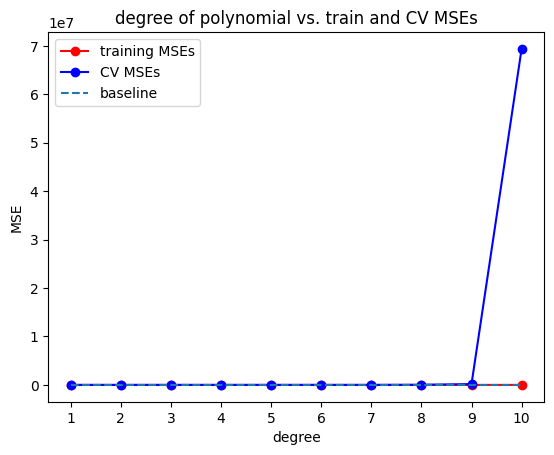

In [ ]:
train_plot_poly(model, x_train, y_train, x_cv, y_cv, max_degree=10, baseline=250)

In [ ]:
x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_dataset('/content/c2w3_lab2_data2.csv')

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")

# Preview the first 5 rows
print(f"first 5 rows of the training inputs (2 features):\n {x_train[:5]}\n")

the shape of the training set (input) is: (60, 2)
the shape of the training set (target) is: (60,)

the shape of the cross validation set (input) is: (20, 2)
the shape of the cross validation set (target) is: (20,)

first 5 rows of the training inputs (2 features):
 [[3.76e+03 5.49e+00]
 [2.88e+03 6.71e+00]
 [3.55e+03 3.72e+00]
 [1.58e+03 5.98e+00]
 [1.67e+03 1.62e+00]]



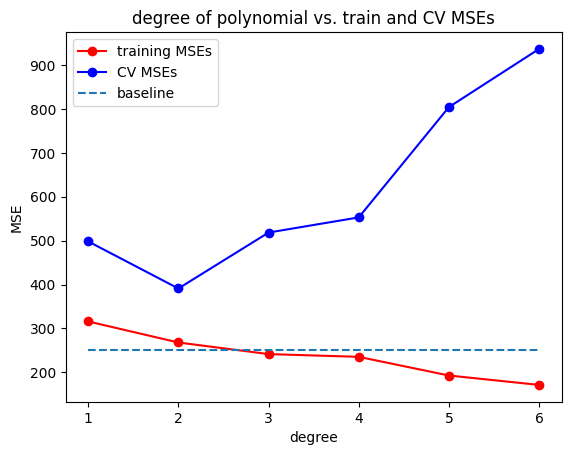

In [ ]:
# Instantiate the model class
model = LinearRegression()

# Train and plot polynomial regression models. Dataset used has two features.
train_plot_poly(model, x_train, y_train, x_cv, y_cv, max_degree=6, baseline=250)

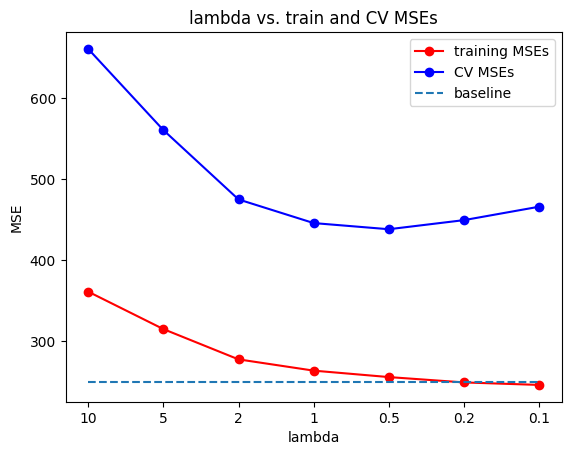

In [ ]:
# Define lambdas to plot
reg_params = [10, 5, 2, 1, 0.5, 0.2, 0.1]

# Define degree of polynomial and train for each value of lambda
train_plot_reg_params(reg_params, x_train, y_train, x_cv, y_cv, degree= 4, baseline=250)

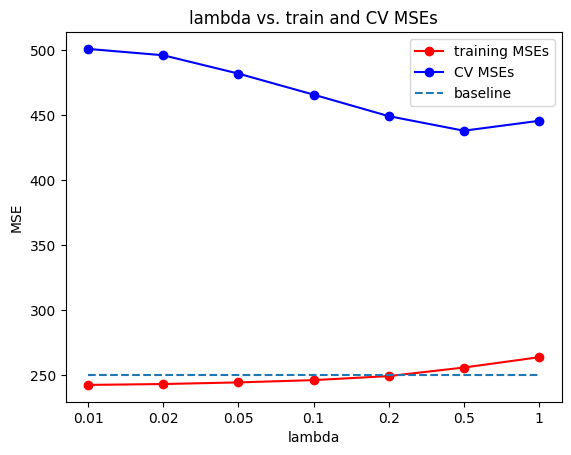

In [ ]:
# Define lambdas to plot
reg_params = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]

# Define degree of polynomial and train for each value of lambda
train_plot_reg_params(reg_params, x_train, y_train, x_cv, y_cv, degree= 4, baseline=250)

In [ ]:
# Prepare dataset with randomID feature
x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_dataset('/content/c2w3_lab2_data2.csv')

# Preview the first 5 rows
print(f"first 5 rows of the training set with 2 features:\n {x_train[:5]}\n")

# Prepare dataset with randomID feature
x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_dataset('/content/c2w3_lab2_data3.csv')

# Preview the first 5 rows
print(f"first 5 rows of the training set with 3 features (1st column is a random ID):\n {x_train[:5]}\n")

first 5 rows of the training set with 2 features:
 [[3.76e+03 5.49e+00]
 [2.88e+03 6.71e+00]
 [3.55e+03 3.72e+00]
 [1.58e+03 5.98e+00]
 [1.67e+03 1.62e+00]]

first 5 rows of the training set with 3 features (1st column is a random ID):
 [[1.42e+07 3.76e+03 5.49e+00]
 [1.52e+07 2.88e+03 6.71e+00]
 [1.93e+07 3.55e+03 3.72e+00]
 [1.25e+07 1.58e+03 5.98e+00]
 [1.77e+07 1.67e+03 1.62e+00]]



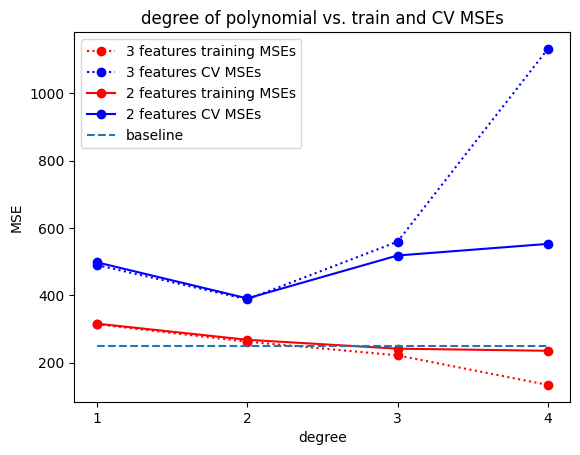

In [ ]:
# Define the model
model = LinearRegression()

# Define properties of the 2 datasets
file1 = {'filename':'/content/c2w3_lab2_data3.csv', 'label': '3 features', 'linestyle': 'dotted'}
file2 = {'filename':'/content/c2w3_lab2_data2.csv', 'label': '2 features', 'linestyle': 'solid'}
files = [file1, file2]

# Train and plot for each dataset
train_plot_diff_datasets(model, files, max_degree=4, baseline=250)

the shape of the entire training set (input) is: (600, 2)
the shape of the entire training set (target) is: (600,)

the shape of the entire cross validation set (input) is: (200, 2)
the shape of the entire cross validation set (target) is: (200,)



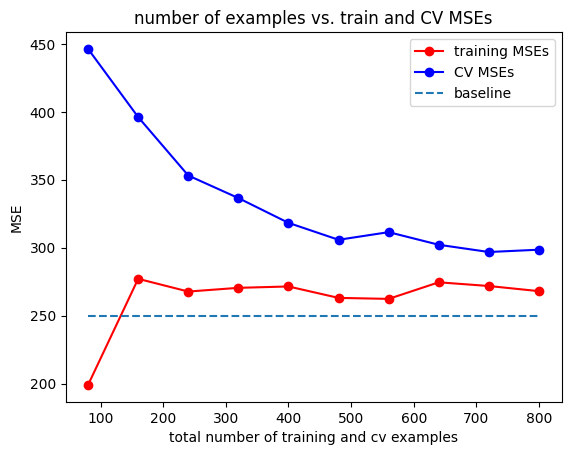

In [ ]:
x_train, y_train, x_cv, y_cv, x_test, y_test = prepare_dataset('/content/c2w3_lab2_data4.csv')
print(f"the shape of the entire training set (input) is: {x_train.shape}")
print(f"the shape of the entire training set (target) is: {y_train.shape}\n")
print(f"the shape of the entire cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the entire cross validation set (target) is: {y_cv.shape}\n")

# Instantiate the model class
model = LinearRegression()

# Define the degree of polynomial and train the model using subsets of the dataset.
train_plot_learning_curve(model, x_train, y_train, x_cv, y_cv, degree= 4, baseline=250)